# LG 입자 형태분석 모델개발 해커톤 base line

&nbsp;

## 기본설정

&nbsp;

### colab 드라이브 연동

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


&nbsp;

### pytorch 버전확인

In [ ]:
import torch
import os
torch.__version__

'1.12.0+cu113'

&nbsp;

### mmdetection 폴더 생성 및 이동

In [ ]:
import os

os.chdir('/content/')
os.mkdir('lg_test')
os.chdir('lg_test')

- 경로 확인

In [ ]:
os.getcwd()

'/content/lg_test'

&nbsp;

### mmdetection 설치
- colab 기준으로 설정한 설치 과정 만약 임의의 pytorch 버전 사용 시 밑의 과정은 달라질 수 있음

In [ ]:
!pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu113/torch1.12.0/index.html
!git clone https://github.com/open-mmlab/mmdetection.git
%cd mmdetection
!pip install -r requirements/build.txt
!pip install -v -e .
!pip install mmdet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu113/torch1.12.0/index.html
     |████████████████████████████████| 40.6 MB 1.7 MB/s 
     |████████████████████████████████| 190 kB 4.2 MB/s 
Cloning into 'mmdetection'...
remote: Enumerating objects: 29025, done.
remote: Counting objects: 100% (107/107), done.
remote: Compressing objects: 100% (77/77), done.
remote: Total 29025 (delta 39), reused 71 (delta 30), pack-reused 28918
Receiving objects: 100% (29025/29025), 39.50 MiB | 13.97 MiB/s, done.
Resolving deltas: 100% (20746/20746), done.
/content/lg_test/mmdetection
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Using pip 21.1.3 from /usr/local/lib/python3.7/dist-packages/pip (python 3.7)
Value for scheme.platlib does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/lib/python

- mmdet 버전확인

In [ ]:
import mmdet
print(mmdet.__version__)

2.25.1


&nbsp;

- 폴더 확인

In [ ]:
os.listdir()

['docs',
 'docker',
 'mmdet',
 '.pre-commit-config.yaml',
 'README.md',
 '.readthedocs.yml',
 'LICENSE',
 'tools',
 '.owners.yml',
 'setup.cfg',
 'configs',
 'README_zh-CN.md',
 'MANIFEST.in',
 'resources',
 'model-index.yml',
 'pytest.ini',
 'requirements.txt',
 'CITATION.cff',
 'tests',
 'requirements',
 '.git',
 'demo',
 '.gitignore',
 'mmdet.egg-info',
 '.circleci',
 '.dev_scripts',
 '.github',
 'setup.py']

&nbsp;

## 데이터 다운 및 데이터 확인

- 해당 경로 확인

In [ ]:
os.getcwd()

'/content/lg_test/mmdetection'

### 데이터 폴더 생성 및 이동

In [ ]:
%mkdir data

In [ ]:
%cd data

/content/lg_test/mmdetection/data


&nbsp;

### 데이터 다운 [lg 데이터](https://drive.google.com/file/d/1kepvD1uQqhRBhkNb08r3rmocA2U3-3NF/view)

In [ ]:
os.getcwd()

'/content/lg_test/mmdetection/data'

In [ ]:
!gdown --id 1kepvD1uQqhRBhkNb08r3rmocA2U3-3NF

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1kepvD1uQqhRBhkNb08r3rmocA2U3-3NF
To: /content/lg_test/mmdetection/data/dataset.zip
100% 212M/212M [00:00<00:00, 264MB/s]


- 압축풀기

In [ ]:
os.getcwd()

'/content/lg_test/mmdetection/data'

In [ ]:
!unzip -qq  "/content/lg_test/mmdetection/data/dataset.zip"

&nbsp;

### label_test.json 수정

In [ ]:
import json

with open("/content/lg_test/mmdetection/data/dataset/label_test.json") as f:
  data_train = json.load(f)

data_train['categories'] = [{'id': 1, 'name': 'Normal'}]

print(data_train.keys())

with open('/content/lg_test/mmdetection/data/dataset/test.json', 'w') as f:
    json.dump(data_train, f)

dict_keys(['images', 'categories'])


&nbsp;

## Mask R-CNN base-line

### 방법1. train.py 사용

- mmdetection에서 제공하는 train.py 사용 시 미리 원하는 모델 및 설정을 담은 custom.py 파일을 만들어야 합니다.

- custom 폴더 생성

In [ ]:
os.chdir('/content/lg_test/mmdetection/configs')

In [ ]:
os.mkdir('custom')

**!!!!! lg_mask.py를 꼭  만들어야 합니다. !!!!!**

#### lg_mask.py 파일 예시

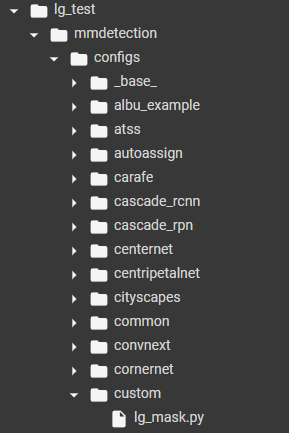


- 해당 위치에서 새로운 파일 만들기 lg_mask.py 생성
- lg_mask.py 안에 밑의 내용 복사 붙여넣기

```python

# 사용할 모델 선택
_base_ = '../mask_rcnn/mask_rcnn_r50_fpn_1x_coco.py'

# 모델 class수 변경
model = dict(
  roi_head = dict(
    bbox_head = dict(
      num_classes = 1
    ),
    mask_head = dict(
      num_classes = 1
    )
  )
)

# 데이터 폴더 설정
data_root = 'data/dataset/'
classes = ('Normal',)

# 데이터 설정
data = dict(
    samples_per_gpu=1,
    workers_per_gpu=0,
    train=dict(
      img_prefix=data_root + "train/",
      classes = classes,
      ann_file=data_root + "label(polygon)_train.json"
),
    val=dict(
        img_prefix=data_root + "train/",
        classes = classes,
        ann_file=data_root + "label(polygon)_train.json"
),
    test=dict(
        img_prefix=data_root + "test/",
        classes = classes,
        ann_file=data_root + "test.json"
)
)





# log 저장 위치
checkpoint_config = dict(interval=1,out_dir='work_dirs/lg_mask/')

# 평가 방법
evaluation = dict(interval=1, metric=['bbox', 'segm'])

# 사전 가중치 사용
load_from = 'checkpoint/mask_rcnn_r50_fpn_1x_coco_20200205-d4b0c5d6.pth'

# epoch 설정
runner = dict(type='EpochBasedRunner', max_epochs=5)

# batch size 설정
auto_scale_lr = dict(enable=False, base_batch_size=16)
```

&nbsp;

#### Mask R-CNN 사전 가중치 저장

- 사전 가중치는 [사전 가중치 다운링크](https://download.openmmlab.com/mmdetection/v2.0/mask_rcnn/mask_rcnn_r50_fpn_1x_coco/mask_rcnn_r50_fpn_1x_coco_20200205-d4b0c5d6.pth) 다운받고 해당 가중치 /content/lg_test/mmdetection/checkpoint 에 저장 (checkpoint는 폴더 생성한 것임)

In [ ]:
os.chdir('/content/lg_test/mmdetection/')
os.mkdir('checkpoint')
os.chdir('checkpoint')

In [ ]:
from requests import get

def download(url, file_name):
    with open(file_name, "wb") as file:
        response = get(url)
        file.write(response.content)


url = "https://download.openmmlab.com/mmdetection/v2.0/mask_rcnn/mask_rcnn_r50_fpn_1x_coco/mask_rcnn_r50_fpn_1x_coco_20200205-d4b0c5d6.pth"
download(url,"mask_rcnn_r50_fpn_1x_coco_20200205-d4b0c5d6.pth")

- Mask R-CNN 훈련

In [ ]:
os.chdir('/content/lg_test/mmdetection/')

In [ ]:
!python ./tools/train.py configs/custom/lg_mask.py --work-dir configs/custom/lg/

2022-07-13 07:27:46,570 - mmdet - INFO - Environment info:
------------------------------------------------------------
sys.platform: linux
Python: 3.7.13 (default, Apr 24 2022, 01:04:09) [GCC 7.5.0]
CUDA available: True
GPU 0: Tesla P100-PCIE-16GB
CUDA_HOME: /usr/local/cuda
NVCC: Cuda compilation tools, release 11.1, V11.1.105
GCC: x86_64-linux-gnu-gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
PyTorch: 1.12.0+cu113
PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201402
  - Intel(R) Math Kernel Library Version 2020.0.0 Product Build 20191122 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.6.0 (Git Hash 52b5f107dd9cf10910aaa19cb47f3abf9b349815)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.3
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm_50;-gencode;arch=compute_60,code=sm_60;-gencode;a

&nbsp;

#### 결과 이미지 및 bbox, segm json 반환

In [ ]:
# 해당하는 폴더에 예측 json 저장 하는 코드입니다.

!python tools/test.py configs/custom/lg_mask.py work_dirs/lg_mask/lg/latest.pth --show-dir results/lg_mask --format-only --eval-options "jsonfile_prefix=./work_dirs/lg_cfg/predict"

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
load checkpoint from local path: work_dirs/lg_mask/lg/latest.pth
[>>] 350/350, 0.8 task/s, elapsed: 442s, ETA:     0s

&nbsp;

#### 결과 json 확인 및 결과 이미지 시각화

- 이미지 결과 시각화

In [ ]:
from glob import glob
import cv2
from google.colab.patches import cv2_imshow

data_list = glob('/content/lg_test/mmdetection/results/lg_mask/*.jpg')
for i in data_list[:10]:
  src = cv2.imread(i)

  cv2_imshow(src)

&nbsp;

- json 결과 시각화

In [ ]:
os.listdir('/content/lg_test/mmdetection/work_dirs/lg_cfg/') # 여기서 predict.segm.json , predict.bbox.json

['predict.bbox.json', 'predict.segm.json']

In [ ]:
import json

with open("/content/lg_test/mmdetection/work_dirs/lg_cfg/predict.bbox.json") as f:
    out_data1 = json.load(f)

with open("/content/lg_test/mmdetection/work_dirs/lg_cfg/predict.segm.json") as f:
    out_data2 = json.load(f)

In [ ]:
out_data1[0] , out_data2[0]

({'bbox': [505.6076965332031,
   548.7615356445312,
   46.242950439453125,
   41.49090576171875],
  'category_id': 1,
  'image_id': 0,
  'score': 0.9464501142501831},
 {'bbox': [505.6076965332031,
   548.7615356445312,
   46.242950439453125,
   41.49090576171875],
  'category_id': 1,
  'image_id': 0,
  'score': 0.9464501142501831,
  'segmentation': {'counts': 'cak?6ho06J6J4M4K3N1O2O1N101O0100O2O0O1O100O1O2N010O2N1O1O1O1O1O1O1O001O001O1O001O1O0O2O1N1O5Il]hf0',
   'size': [1024, 1280]}})

**최종 결과물은 predict.segm.json과 같은 형식으로 제출**

&nbsp;

### 방법2. config 사용

- mmdetection에서 제공하는 config 사용 시 원하는 변수로 설정해야 합니다.
- 빠르게 모델 inference를 수행할 때 적합, json 결과물은 따로 주지 않습니다.
- json 제출 결과물은 방법 1번을 사용해 주세요, 2번 방법은 빠르게 모델을 확인하는 용도가 적합합니다.
- config 설정
  - git clone한 mmdetection 으로 이동 후 수행

&nbsp;

&nbsp;

## config 지정

In [ ]:
import mmcv
from mmcv.runner import load_checkpoint
from mmdet.apis import inference_detector, show_result_pyplot
from mmdet.models import build_detector
from mmdet.apis import set_random_seed

# 사용할 모데 초기 py 설정
config = './configs/mask_rcnn/mask_rcnn_r50_fpn_1x_coco.py'

# config 불러오기
cfg = mmcv.Config.fromfile(config)

# 데이터셋 지정
cfg.dataset_type = 'CocoDataset'

# data_root는 사용자가 저장한 데이터가 있는 폴더 전까지
data_root = 'data/dataset/'

# class 설정
cfg.classes = ('Normal',)

# train, val, test 데이터셋에 대한 type, data_root, ann_file, img_prefix 설정

cfg.data.samples_per_gpu=1
cfg.data.workers_per_gpu=0

cfg.data.train.data_root = data_root
cfg.data.train.ann_file = 'label(polygon)_train.json'
cfg.data.train.img_prefix = 'train/'
cfg.data.train.classes = cfg.classes

cfg.data.val.data_root = data_root
cfg.data.val.ann_file = 'label(polygon)_train.json'
cfg.data.val.img_prefix = 'train/'
cfg.data.val.classes = cfg.classes

cfg.data.test.data_root = data_root
cfg.data.test.ann_file = 'test.json'
cfg.data.test.img_prefix = 'test/'
cfg.data.test.classes = cfg.classes

# 클래스 수 지정
cfg.model.roi_head.bbox_head.num_classes = 1
cfg.model.roi_head.mask_head.num_classes = 1

# 사전 훈련 모델 지정
cfg.load_from = 'checkpoint/mask_rcnn_r50_fpn_1x_coco_20200205-d4b0c5d6.pth'

# 가중치 저장 위치
cfg.work_dir = './work_dirs/lg_cfg2/'

# learning rate
cfg.optimizer.lr = 0.02 / 8

# 로그 출력 시기 설정
cfg.log_config.interval = 1
cfg.lr_config.policy = 'step'

# 평가 지표로 설정
cfg.evaluation.metric = ['bbox', 'segm']

# 평가 구간 설정
cfg.evaluation.interval = 10

# 체크포인트 구간 설정
cfg.checkpoint_config.interval = 10

# epoch 설정
cfg.runner = dict(type='EpochBasedRunner', max_epochs=5)

# 결과 재현을 위한 시드값 설정
cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.gpu_ids = range(1)
cfg.device='cuda'

&nbsp;

## 모델 훈련

In [ ]:
from mmdet.datasets import build_dataset
from mmdet.models import build_detector
from mmdet.apis import train_detector

# dataset 생성 및 model 설정

datasets = [build_dataset(cfg.data.train)]
model = build_detector(cfg.model)
model.CLASSES = datasets[0].CLASSES

# 훈련
train_detector(model, datasets, cfg, distributed=False, validate=True)

loading annotations into memory...
Done (t=0.82s)
creating index...
index created!


2022-07-15 07:58:48,765 - mmdet - INFO - Automatic scaling of learning rate (LR) has been disabled.


loading annotations into memory...


2022-07-15 07:58:49,716 - mmdet - INFO - load checkpoint from local path: checkpoint/mask_rcnn_r50_fpn_1x_coco_20200205-d4b0c5d6.pth
2022-07-15 07:58:49,856 - mmdet - WARNING - The model and loaded state dict do not match exactly

size mismatch for roi_head.bbox_head.fc_cls.weight: copying a param with shape torch.Size([81, 1024]) from checkpoint, the shape in current model is torch.Size([2, 1024]).
size mismatch for roi_head.bbox_head.fc_cls.bias: copying a param with shape torch.Size([81]) from checkpoint, the shape in current model is torch.Size([2]).
size mismatch for roi_head.bbox_head.fc_reg.weight: copying a param with shape torch.Size([320, 1024]) from checkpoint, the shape in current model is torch.Size([4, 1024]).
size mismatch for roi_head.bbox_head.fc_reg.bias: copying a param with shape torch.Size([320]) from checkpoint, the shape in current model is torch.Size([4]).
size mismatch for roi_head.mask_head.conv_logits.weight: copying a param with shape torch.Size([80, 256, 1,

Done (t=0.91s)
creating index...
index created!


2022-07-15 07:58:59,654 - mmdet - INFO - Epoch [1][1/520]	lr: 2.500e-06, eta: 7:02:02, time: 9.743, data_time: 2.586, memory: 2062, loss_rpn_cls: 3.1084, loss_rpn_bbox: 0.2709, loss_cls: 0.7018, acc: 51.1719, loss_bbox: 0.7344, loss_mask: 0.7259, loss: 5.5413
2022-07-15 07:59:00,288 - mmdet - INFO - Epoch [1][2/520]	lr: 7.495e-06, eta: 3:44:42, time: 0.636, data_time: 0.449, memory: 2405, loss_rpn_cls: 2.2687, loss_rpn_bbox: 0.2319, loss_cls: 0.7300, acc: 42.9688, loss_bbox: 0.7684, loss_mask: 0.7350, loss: 4.7340
2022-07-15 07:59:00,951 - mmdet - INFO - Epoch [1][3/520]	lr: 1.249e-05, eta: 2:39:18, time: 0.663, data_time: 0.471, memory: 2405, loss_rpn_cls: 2.7484, loss_rpn_bbox: 0.2554, loss_cls: 0.7109, acc: 49.4141, loss_bbox: 0.7856, loss_mask: 0.7376, loss: 5.2380
2022-07-15 07:59:01,677 - mmdet - INFO - Epoch [1][4/520]	lr: 1.749e-05, eta: 2:07:17, time: 0.726, data_time: 0.530, memory: 2405, loss_rpn_cls: 2.6998, loss_rpn_bbox: 0.2140, loss_cls: 0.7320, acc: 46.2891, loss_bbox: 

#### 결과 이미지 시각화

In [ ]:
img = mmcv.imread('/content/lg_test/mmdetection/data/dataset/test/0087.jpg')

model.cfg = cfg
result = inference_detector(model, img)
show_result_pyplot(model, img, result)